In [22]:
# from raptor_functions.supervised.datasets import get_data
# df = get_data('handheld_data')

In [23]:
from raptor_functions.supervised.datasets import get_data
df = get_data('handheld_data')

In [24]:
df.head()

,exp_unique_id,exp_name,timesteps,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,...,sensor_23,sensor_24,Humidity (r.h.),measurement_stage,date_exp,time_elapsed,datetime_exp_start,datetime_exp,filename,result
0,0,Test 24,1,131.938,132.443,177.444,178.157,44.974,44.508,219.374,...,143.288,142.050,46.07,baseline,21/3/2022,0.00,14:12:54,2022-03-21 14:12:54.000,5 NegTest_3_20220321_14_12.txt,Control
1,0,Test 24,2,133.078,133.972,177.444,178.694,45.131,44.611,219.607,...,142.874,141.914,46.07,baseline,21/3/2022,0.25,14:12:54,2022-03-21 14:12:54.250,5 NegTest_3_20220321_14_12.txt,Control
2,0,Test 24,3,131.812,132.064,177.622,178.694,45.183,44.663,219.841,...,143.288,141.914,46.07,baseline,21/3/2022,0.50,14:12:54,2022-03-21 14:12:54.500,5 NegTest_3_20220321_14_12.txt,Control
3,0,Test 24,4,131.059,132.064,177.444,178.694,45.183,44.663,219.607,...,142.599,141.368,46.07,baseline,21/3/2022,0.75,14:12:54,2022-03-21 14:12:54.750,5 NegTest_3_20220321_14_12.txt,Control
4,0,Test 24,5,131.435,131.938,177.622,178.694,45.131,44.663,219.607,...,142.187,140.825,46.07,baseline,21/3/2022,1.00,14:12:54,2022-03-21 14:12:55.000,5 NegTest_3_20220321_14_12.txt,Control


In [25]:
import numpy as np
import pandas as pd
import xgboost as xgb
from boruta import BorutaPy
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import (
    ComprehensiveFCParameters,
    extract_features,
)
from tsfresh import extract_features

In [26]:
FEATURES = [
    "exp_unique_id",
    "timesteps",
    "sensor_1",
    "sensor_2",
    "sensor_3",
    "sensor_4",
    "sensor_5",
    "sensor_6",
    "sensor_7",
    "sensor_8",
    "sensor_9",
    "sensor_10",
    "sensor_11",
    "sensor_12",
    "sensor_13",
    "sensor_14",
    "sensor_15",
    "sensor_16",
    "sensor_17",
    "sensor_18",
    "sensor_19",
    "sensor_20",
    "sensor_21",
    "sensor_22",
    "sensor_23",
    "sensor_24",
]

TARGET_COL = "result"

unique_id="exp_unique_id"
label="result"
timesteps="timesteps"

In [27]:
extraction_settings = ComprehensiveFCParameters()

In [28]:
y = df.groupby(unique_id).first()[label]
X = df.drop(label, axis=1)

In [29]:
features = [col for col in X if col.startswith('sensor')]
features = [unique_id, timesteps] + features

X = X[features]

# X = df.drop(label, axis=1)
# y = df.groupby(unique_id).first()[label]

X = extract_features(
    X,
    column_id=unique_id,
    column_sort=timesteps,
    default_fc_parameters=extraction_settings,
    # we impute = remove all NaN features automatically
    impute_function=impute,
)

Feature Extraction: 100%|██████████| 20/20 [00:09<00:00,  2.04it/s]


In [30]:
df = X.join(y)

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [32]:
import matplotlib.pyplot as plt

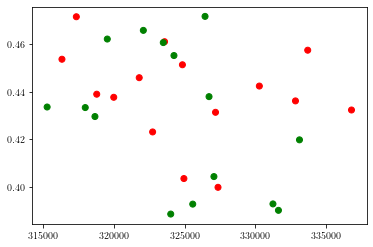

In [33]:
# PLotting two variables
colors = {'Control':'green', 'Covid':'red'}
plt.scatter(X.iloc[:,5], X.iloc[:,6], c=df[TARGET_COL].map(colors))
plt.show()

In [34]:
colors = {'Control':'green', 'Covid':'red'}

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [37]:
import matplotlib
# matplotlib.use("pdf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

/Users/danielfiuzadosil/opt/anaconda3/envs/venv-3.7/lib/python3.7/site-packages/matplotlib/collections.py:1099: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


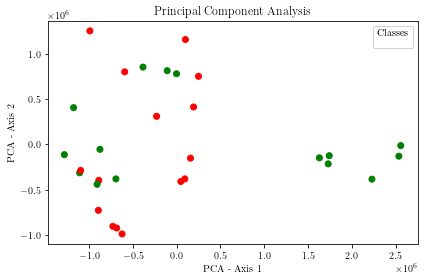

In [38]:
fig, axs = plt.subplots(1,1,tight_layout=True)
# 
scatter = plt.scatter(principalDf.iloc[:,0], principalDf.iloc[:,1], c=df[TARGET_COL].map(colors))
# 
axs.set_ylabel('PCA - Axis 2')
axs.set_xlabel('PCA - Axis 1')
axs.set_title('Principal Component Analysis')
# 
legend1 = axs.legend(*scatter.legend_elements(),loc="upper right", title="Classes")
axs.add_artist(legend1)
# 
plt.show()

Text(0.5, 1.0, 'Principal Component Analysis')

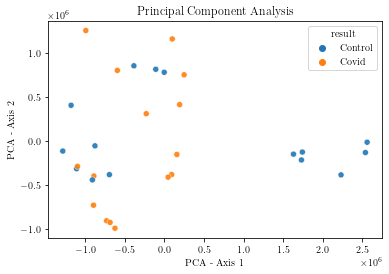

In [50]:
import seaborn as sns
axs = sns.scatterplot(x=principalDf.iloc[:,0], y=principalDf.iloc[:,1], hue=y, alpha=0.9)
# 
axs.set_ylabel('PCA - Axis 2')
axs.set_xlabel('PCA - Axis 1')
axs.set_title('Principal Component Analysis')